# Necessary Imports and Installations

In [2]:
!pip install skrebate

In [3]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path="/content/drive/MyDrive/Colab Notebooks/Datasets/diabetic_data.csv"
dataset = pd.read_csv(path)
df=dataset.copy()

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.shape

(101766, 50)

In [9]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype !='O']

# Exploratory Data Analysis

In [11]:
dataset1=dataset.copy()

dataset1['readmitted'] = dataset1['readmitted'].replace(['<30'], 'YES')
dataset1=dataset1[dataset1['readmitted']!='>30']

In [12]:
df=dataset1
dfn = df.drop(df[df['readmitted'] != 'NO'].index)
dfy=df.drop(df[df['readmitted'] == 'NO'].index)

In [13]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['number_outpatient'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
number_outpatient
0     56988
1      4833
2      1928
3      1120
4       619
5       290
6       149
7        72
8        58
9        45
10       22
11       18
13       17
12       15
14       11
16        7
15        6
17        5
20        3
21        3
24        2
26        1
23        1
25        1
22        1
35        1
36        1
29        1
19        1
18        1
40        1
Name: count, dtype: int64


In [14]:
df1=dataset1[numerical_features]
df2=df1.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
l=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [15]:
col_nd=['num_medications','num_lab_procedures','time_in_hospital']

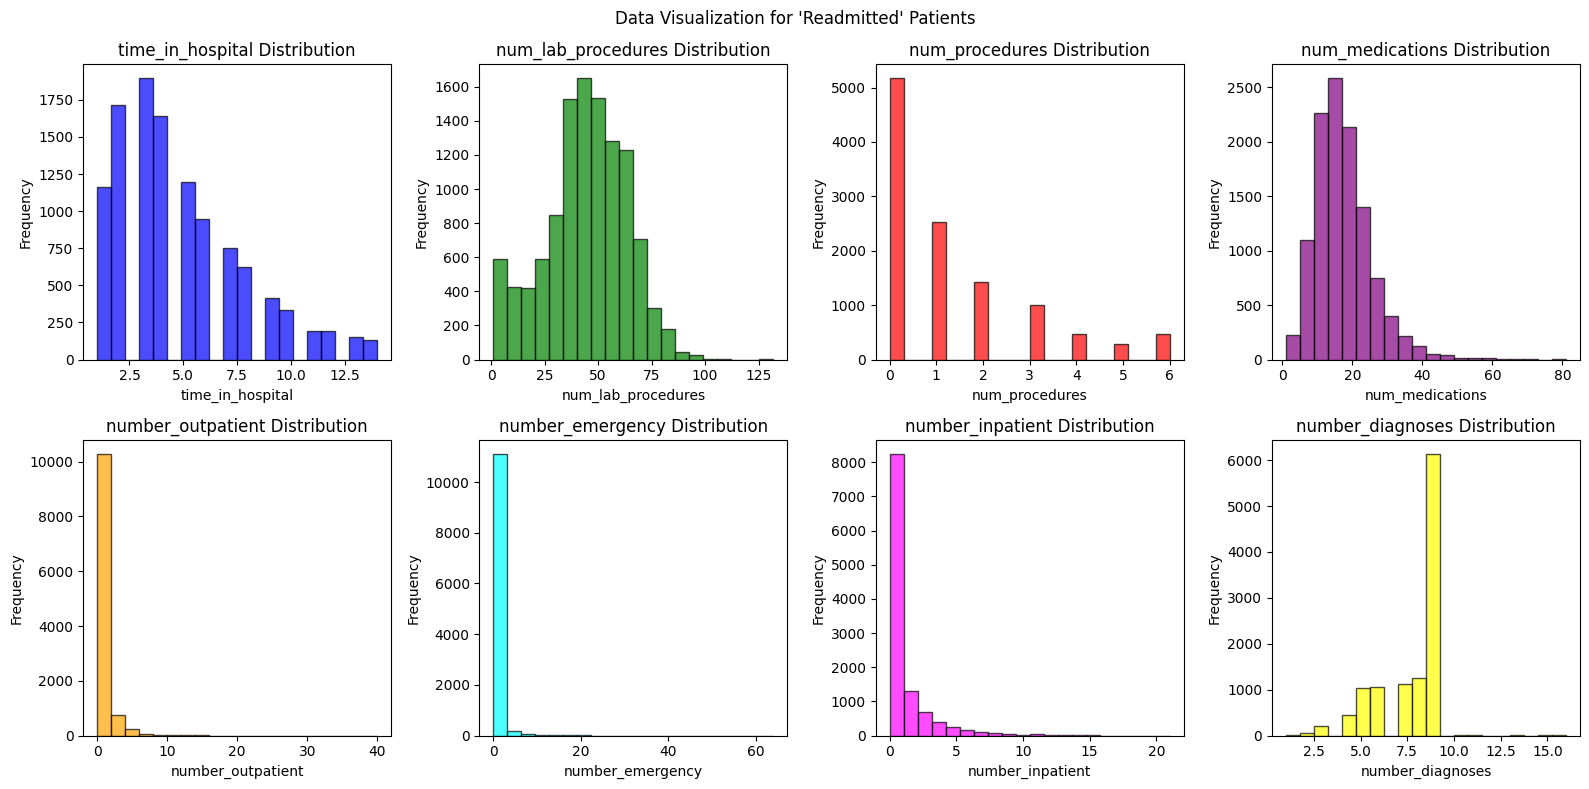

In [16]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        ax.hist(dfy[l[i]], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        ax.set_title(f'{l[i]} Distribution')
        ax.set_xlabel(l[i])
        ax.set_ylabel('Frequency')

fig.suptitle("Data Visualization for 'Readmitted' Patients")
plt.tight_layout()
plt.show()


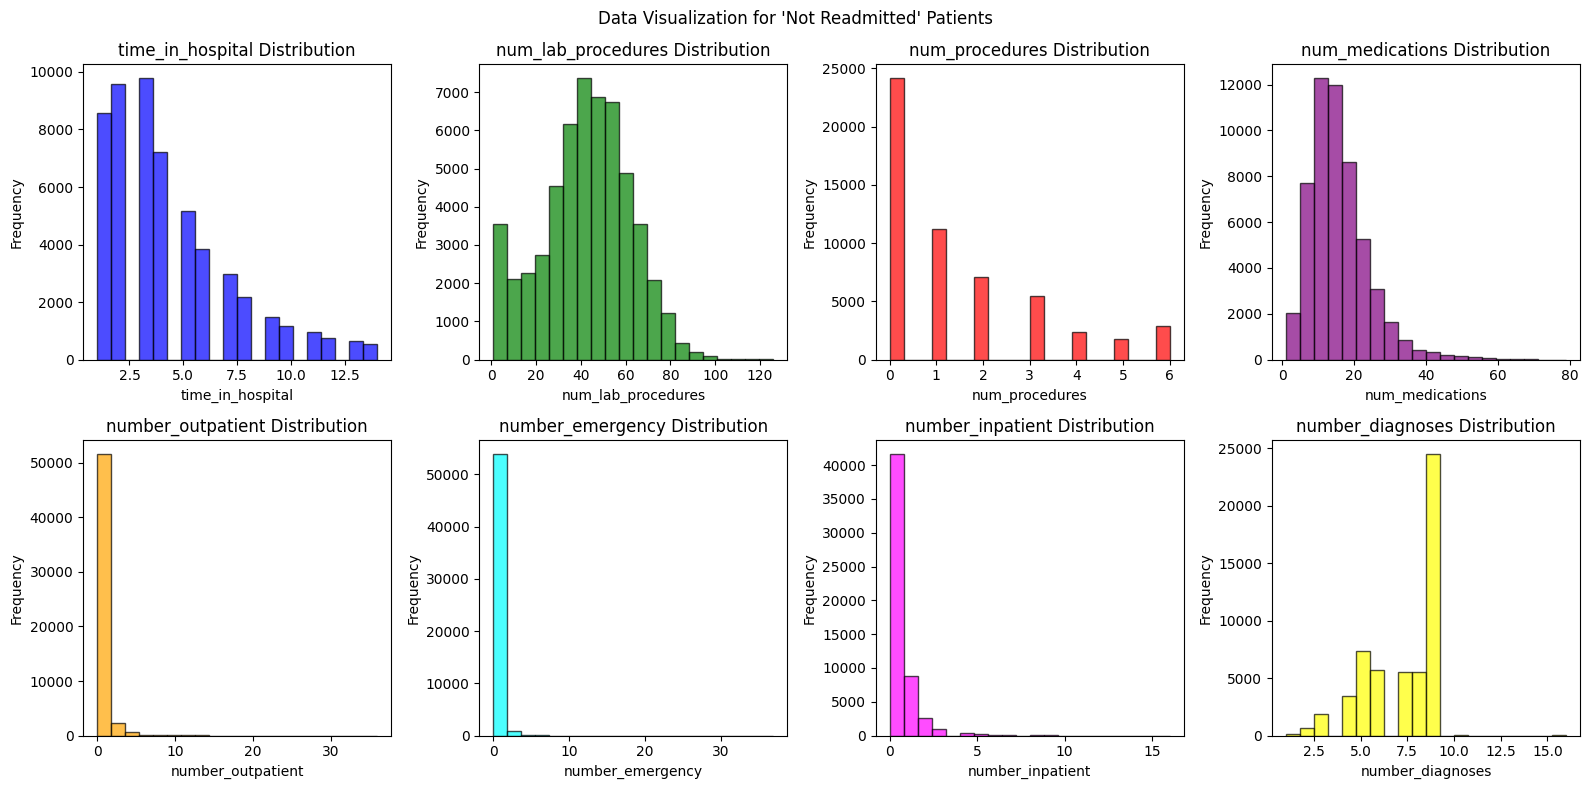

In [17]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        ax.hist(dfn[l[i]], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        ax.set_title(f'{l[i]} Distribution')
        ax.set_xlabel(l[i])
        ax.set_ylabel('Frequency')

fig.suptitle("Data Visualization for 'Not Readmitted' Patients")
plt.tight_layout()
plt.show()


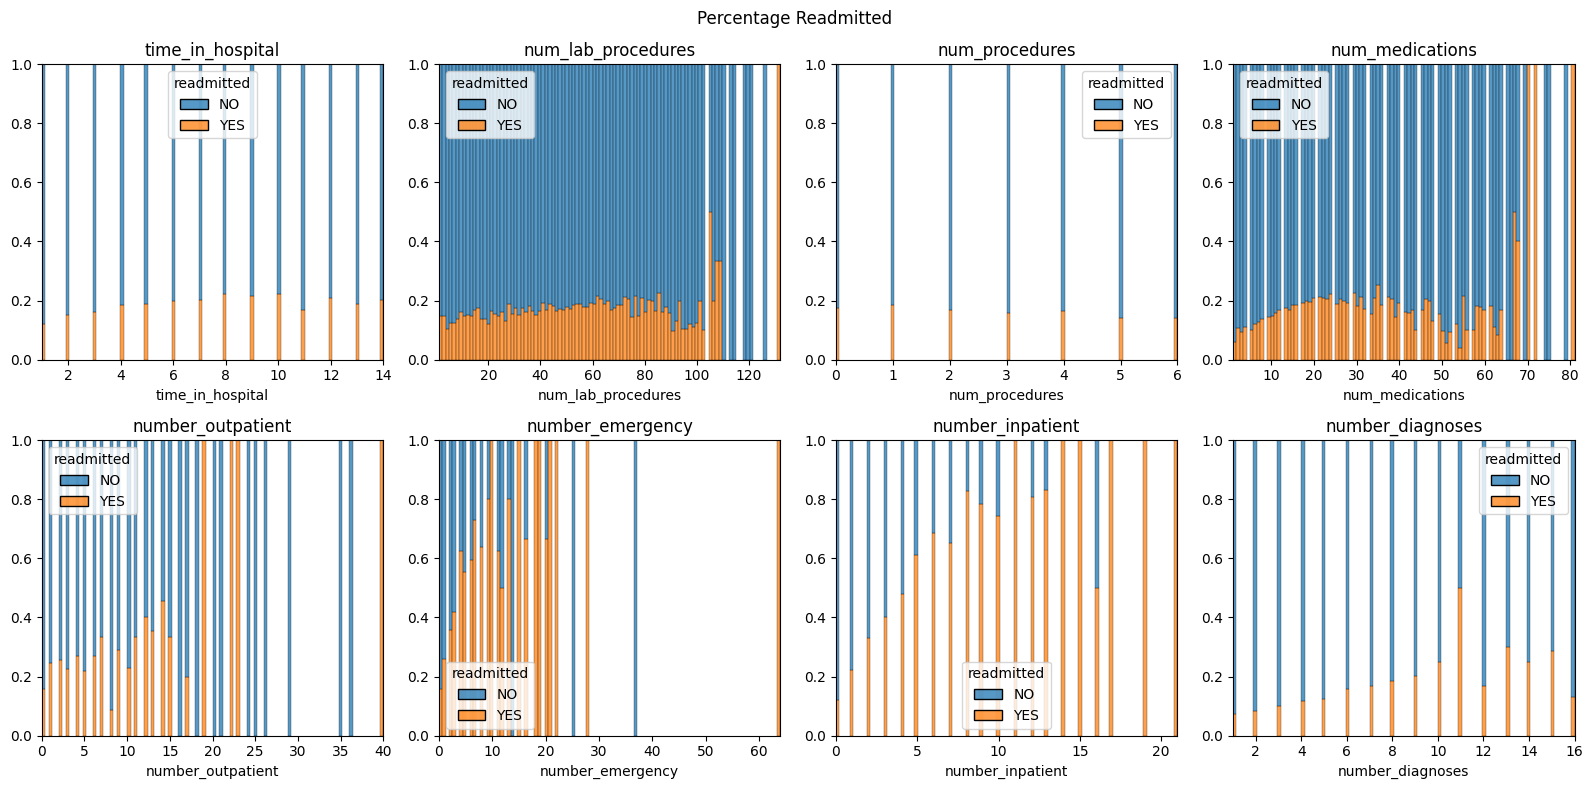

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
  sns.histplot(data=df, x=l[i], hue='readmitted', multiple='fill', bins=100, ax=ax)  # Adjust bins as needed
  ax.set_xlabel(l[i])
  ax.set_ylabel('')
  ax.set_title('{}'.format(l[i]))
fig.suptitle("Percentage Readmitted")
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

def remove_outliers(df, columns):
    """
    Remove rows containing outliers in any of the specified columns.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        columns (list): List of column names to check for outliers.

    Returns:
        DataFrame: DataFrame with outlier rows removed.
    """
    # Define a function to detect outliers using IQR method
    def detect_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (series < lower_bound) | (series > upper_bound)

    # Initialize a mask of False for all rows
    mask = pd.Series(False, index=df.index)

    # Iterate over specified columns
    for col in columns:
        # Apply outlier detection function to each column and combine the results using OR operation
        mask |= detect_outliers(df[col])

    # Return the DataFrame with rows containing outliers removed
    return df[~mask].reset_index(drop=True)  # Reset index to remove gaps in index caused by removed rows

# Example usage:
# Assuming df is your DataFrame and l is your list of numerical columns
# df = pd.DataFrame(...)
# l = ['column1', 'column2', ...]

# df_cleaned = remove_outliers(df, l)



In [20]:
df.shape

(66221, 50)

In [21]:
lbp=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']

In [22]:
df10= remove_outliers(df, lbp)
df10n = df10.drop(df10[df10['readmitted'] != 'NO'].index)
df10y=df10.drop(df10[df10['readmitted'] == 'NO'].index)

In [23]:
df10.shape

(60243, 50)

In [24]:
print(l)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [25]:
df[["number_outpatient", "number_emergency"]]

,number_outpatient,number_emergency
0,0,0
2,2,0
3,0,0
4,0,0
6,0,0
...,...,...
101759,3,0
101762,0,0
101763,1,0
101764,0,0


In [26]:
df10[["number_outpatient", "number_emergency"]]

,number_outpatient,number_emergency
0,2,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
60238,3,0
60239,0,0
60240,1,0
60241,0,0


In [27]:
print(l)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


<ipython-input-28-f74f0773b905>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')  # You can choose any colormap you prefer


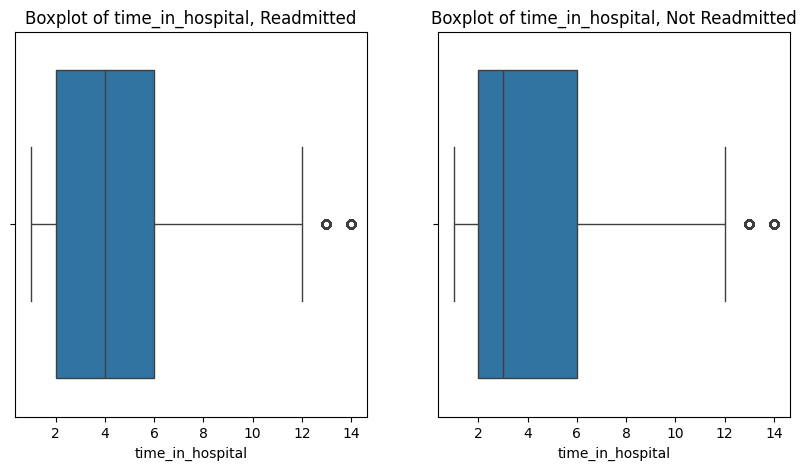

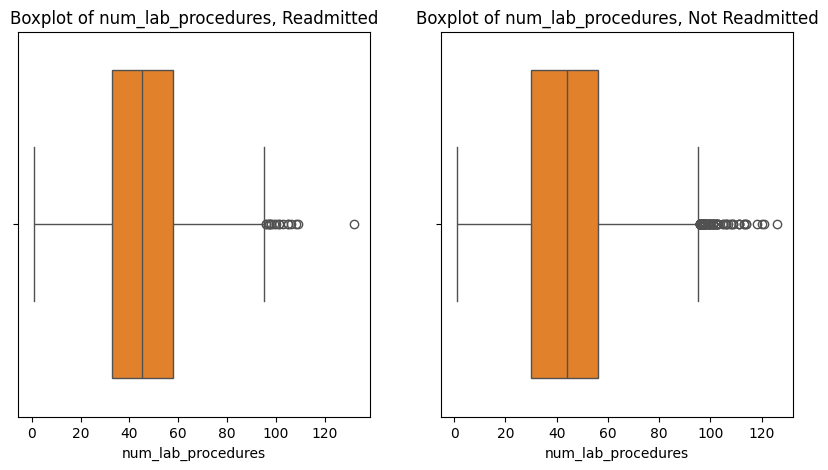

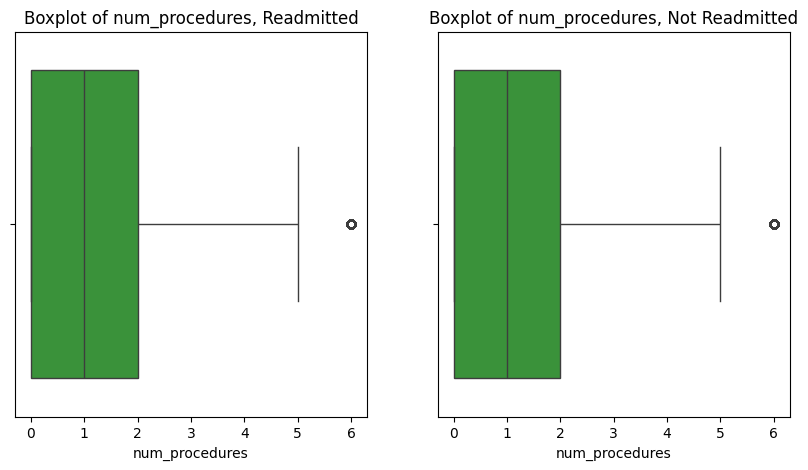

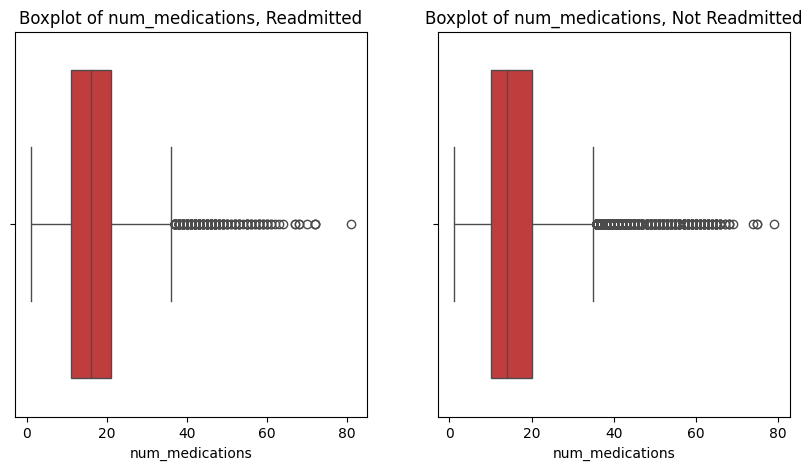

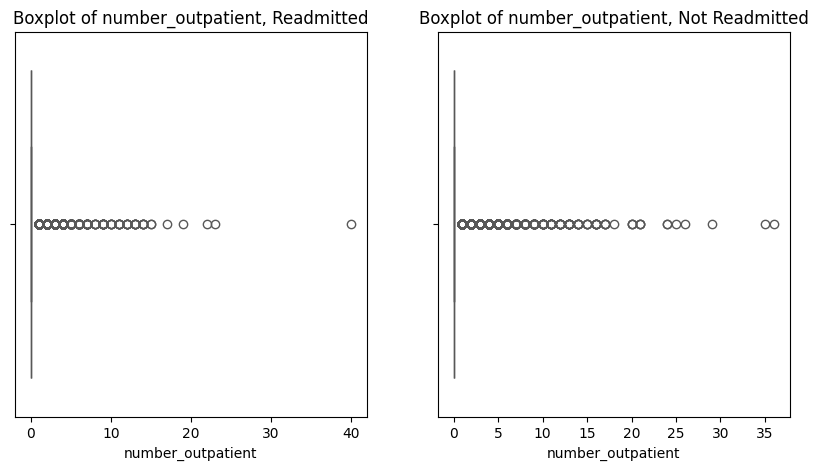

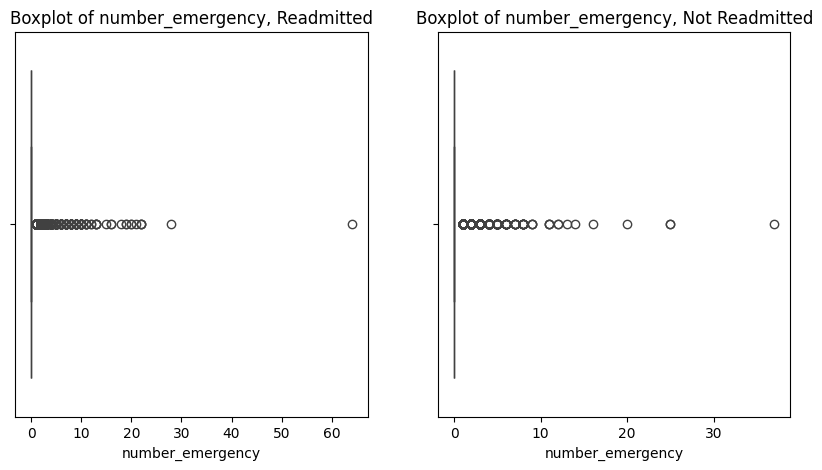

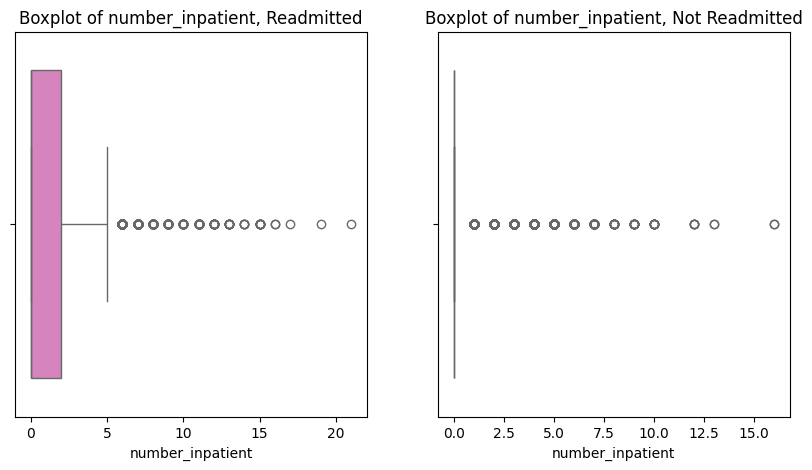

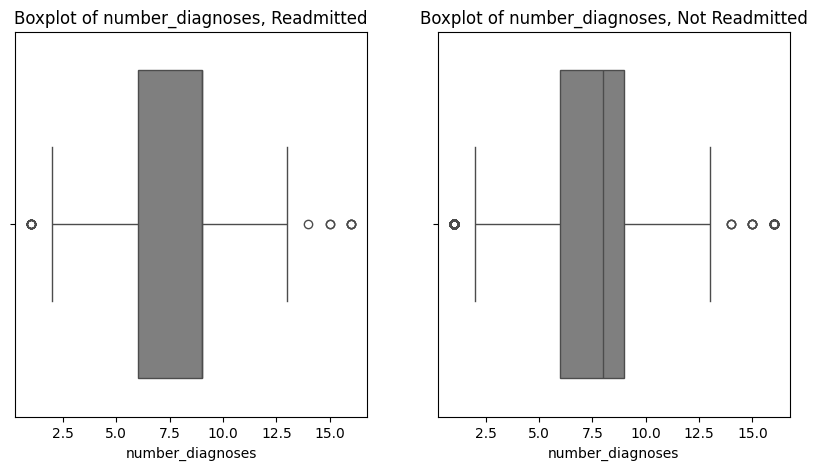

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# Assuming lbp and df10y, df10n are defined earlier

# Define a colormap
cmap = get_cmap('tab10')  # You can choose any colormap you prefer

# Generate colors dynamically based on the number of features in lbp
colors = [cmap(i) for i in range(len(l))]

for i, feature in enumerate(l):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(x=dfy[feature], ax=axes[0], color=colors[i])
    axes[0].set_title(f'Boxplot of {feature}, Readmitted')

    sns.boxplot(x=dfn[feature], ax=axes[1], color=colors[i])
    axes[1].set_title(f'Boxplot of {feature}, Not Readmitted')

plt.show()

<ipython-input-29-287c184e50e7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')  # You can choose any colormap you prefer


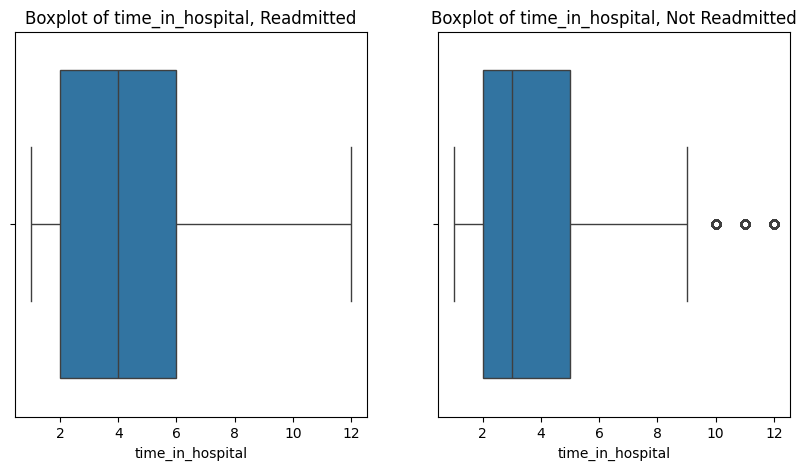

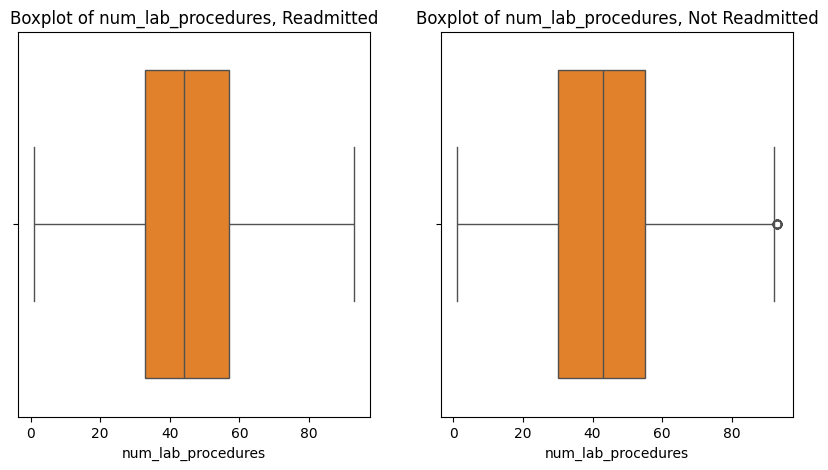

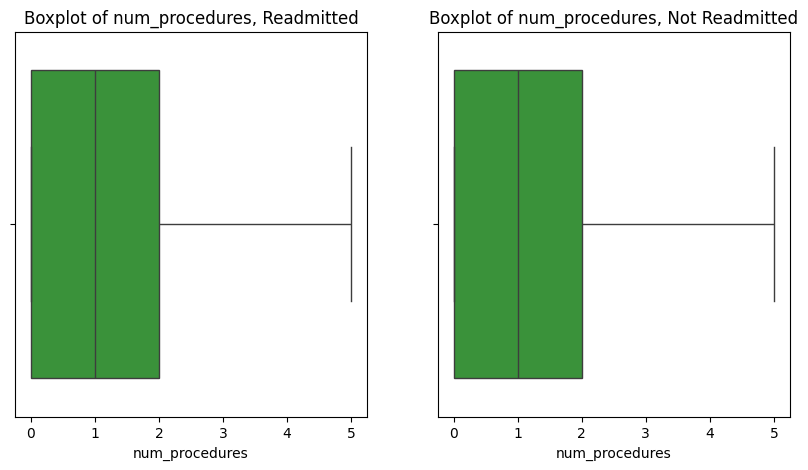

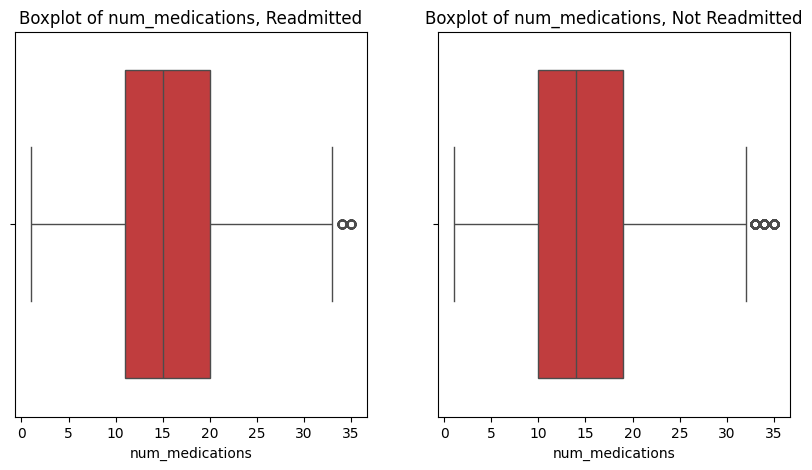

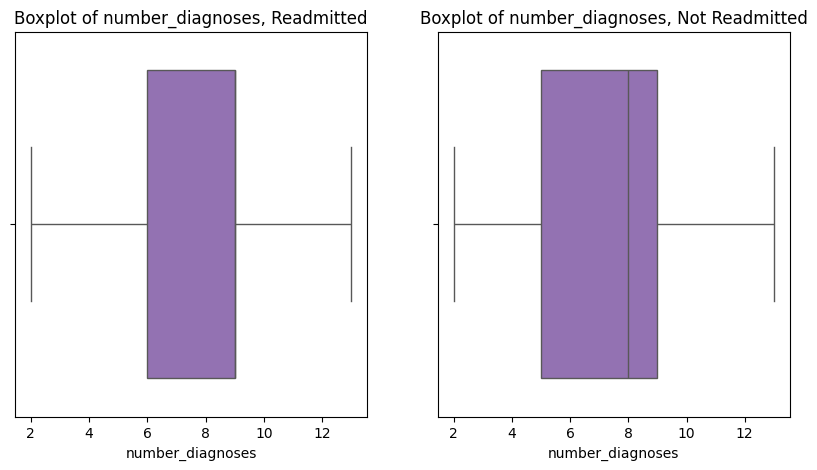

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# Assuming lbp and df10y, df10n are defined earlier

# Define a colormap
cmap = get_cmap('tab10')  # You can choose any colormap you prefer

# Generate colors dynamically based on the number of features in lbp
colors = [cmap(i) for i in range(len(lbp))]

for i, feature in enumerate(lbp):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(x=df10y[feature], ax=axes[0], color=colors[i])
    axes[0].set_title(f'Boxplot of {feature}, Readmitted')

    sns.boxplot(x=df10n[feature], ax=axes[1], color=colors[i])
    axes[1].set_title(f'Boxplot of {feature}, Not Readmitted')

plt.show()


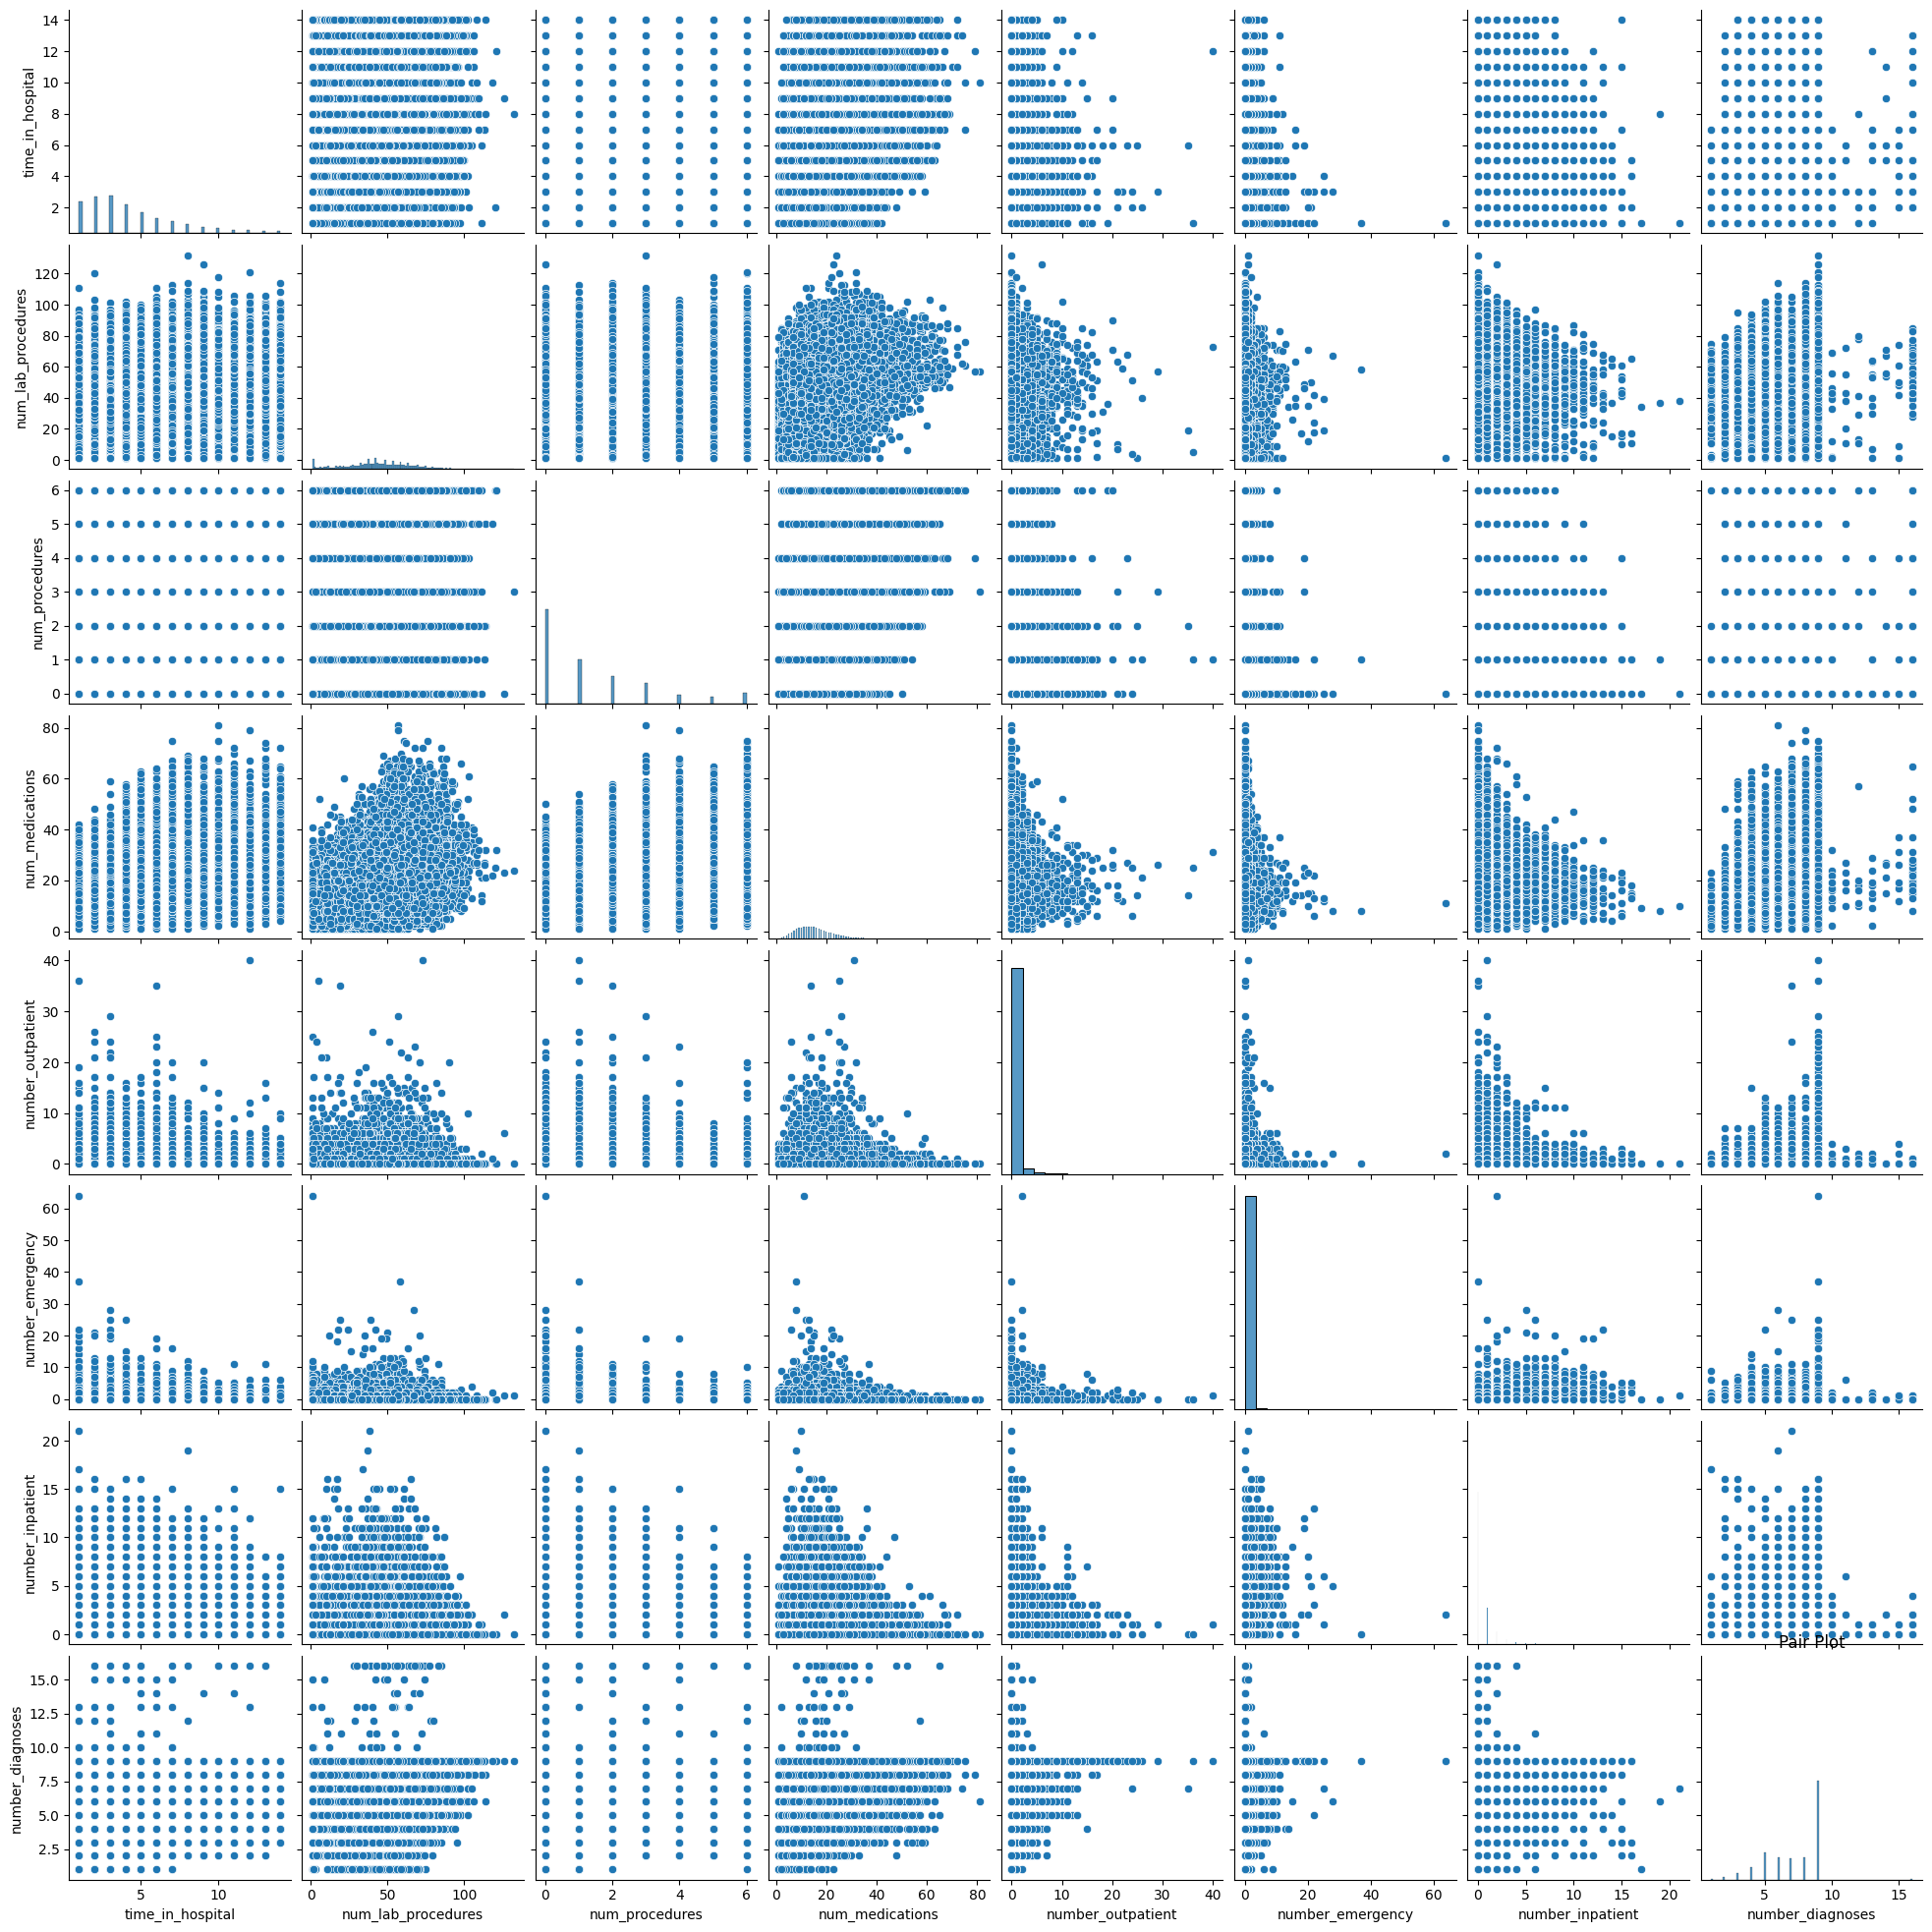

In [30]:
sns.pairplot(df2)
plt.title('Pair Plot')
plt.show()

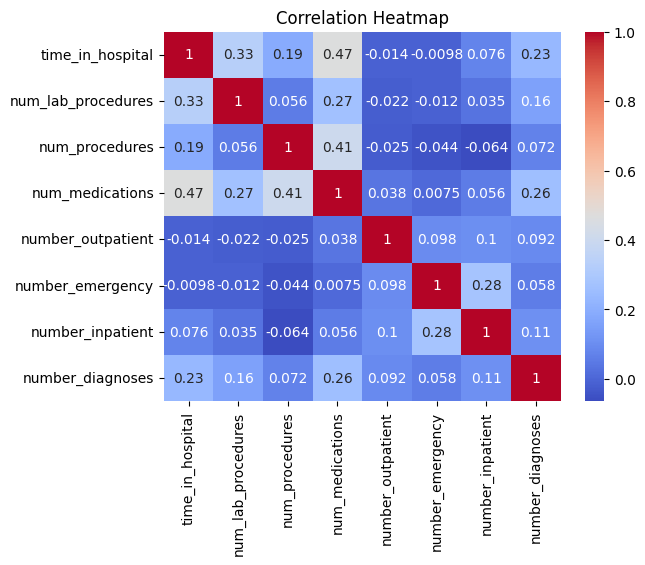

In [31]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

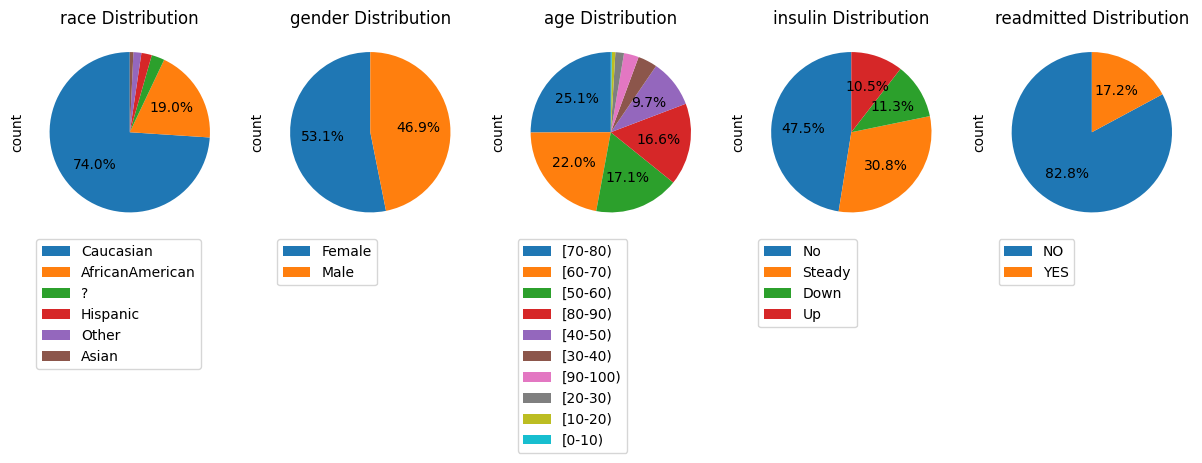

In [32]:
from math import ceil
lc1=["race", "gender", "age", "insulin", "readmitted"]

# Assuming df is your DataFrame

# Get the number of unique categorical columns
num_cols = len(lc1)

# Define the number of columns in the plot
num_columns_in_plot = 5

# Calculate the number of rows needed
num_rows = ceil(num_cols / num_columns_in_plot)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns_in_plot, figsize=(15,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for i, column in enumerate(lc1):
    # Get the top 5 most recurring values
    value_counts = df[column].value_counts()
    values_to_plot = value_counts[value_counts / len(df) >= 0.001]
    # Plot the pie chart without labels alongside the pieces
    pie = values_to_plot.plot.pie(autopct=lambda p: f'{p:.1f}%' if p > 5 else '', startangle=90, ax=axes[i], labels=None)

    # Display legend outside the pie chart with adjusted bbox_to_anchor
    pie.legend(labels=values_to_plot.index, loc='upper left',bbox_to_anchor=(0, 0) )

    axes[i].set_title(f'{column} Distribution')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


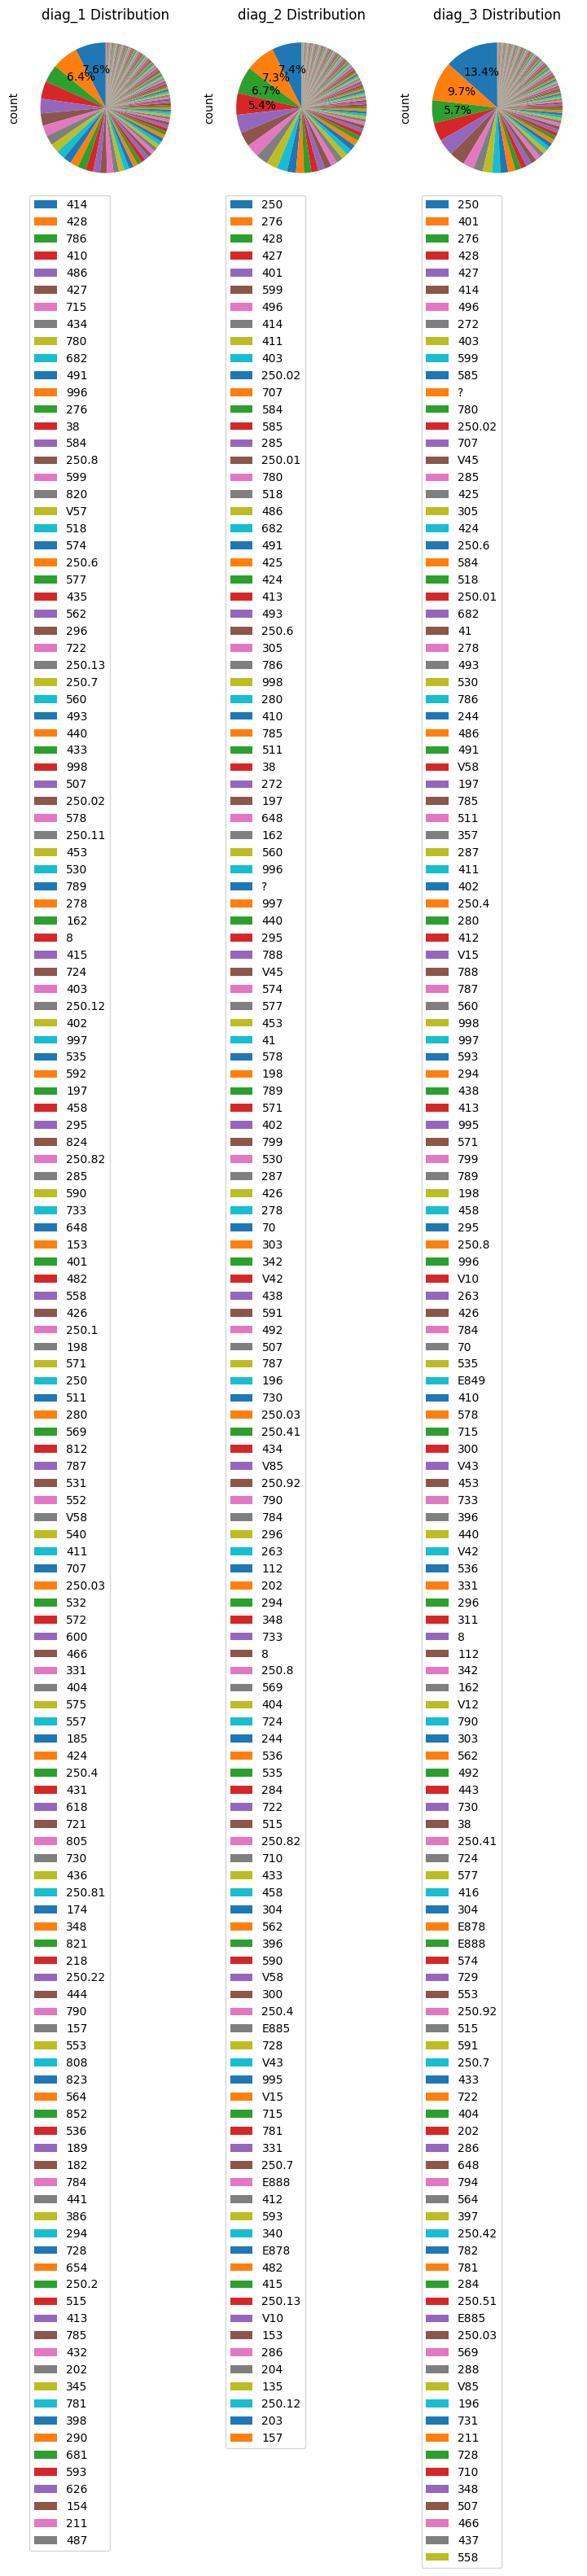

In [33]:
lc2=["diag_1", "diag_2", "diag_3"]

# Assuming df is your DataFrame

# Get the number of unique categorical columns
num_cols = len(lc2)

# Define the number of columns in the plot
num_columns_in_plot = 5

# Calculate the number of rows needed
num_rows = ceil(num_cols / num_columns_in_plot)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns_in_plot, figsize=(15,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for i, column in enumerate(lc2):
    # Get the top 5 most recurring values
    value_counts = df[column].value_counts()
    values_to_plot = value_counts[value_counts / len(df) >= 0.001]
    # Plot the pie chart without labels alongside the pieces
    pie = values_to_plot.plot.pie(autopct=lambda p: f'{p:.1f}%' if p > 5 else '', startangle=90, ax=axes[i], labels=None)

    # Display legend outside the pie chart with adjusted bbox_to_anchor
    pie.legend(labels=values_to_plot.index, loc='upper left',bbox_to_anchor=(0, 0) )

    axes[i].set_title(f'{column} Distribution')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [34]:
df=df10.copy()

In [85]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df10['race'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
race
Caucasian          44305
AfricanAmerican    11680
?                   1560
Hispanic            1316
Other                944
Asian                438
Name: count, dtype: int64


# Preprocessing

## Removing Unnecessay Rows

In [35]:
df = df[df['readmitted'] != '>30']

In [36]:
df.shape

(60243, 50)

## Handling missing value

In [37]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               56945
A1Cresult                   50322
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [38]:
import pandas as pd

# Assuming df is your DataFrame
# Replace "?" with NaN
df.replace("?", pd.NA, inplace=True)

# If "?" is recognized as a missing value without needing replacement, you can simply use the following:
# df.replace("?", inplace=True)

# Display the DataFrame after replacement
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
1,500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,55842,84259809,Caucasian,Male,[60-70),<NA>,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,15738,63555939,Caucasian,Female,[90-100),<NA>,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [39]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Filter columns where the percentage of null values is greater than 0
null_percentage = null_percentage[null_percentage > 0]

# Print the percentage of null values for each column
for column, percentage in null_percentage.items():
    print(f"Column '{column}' has {percentage:.2f}% null values.")



Column 'race' has 2.59% null values.
Column 'weight' has 97.48% null values.
Column 'payer_code' has 39.33% null values.
Column 'medical_specialty' has 47.97% null values.
Column 'diag_1' has 0.03% null values.
Column 'diag_2' has 0.17% null values.
Column 'diag_3' has 1.49% null values.
Column 'max_glu_serum' has 94.53% null values.
Column 'A1Cresult' has 83.53% null values.


In [40]:
import pandas as pd

# Assuming cols_to_replace is a list of column names where you want to replace null values
cols_to_replace = ['weight', 'payer_code', 'medical_specialty','race']

# Calculate mode for each column
modes = df[cols_to_replace].mode().iloc[0]

# Replace null values with the mode for each column
for col in cols_to_replace:
    df[col].fillna(modes[col], inplace=True)



In [41]:
# Assuming cols_to_replace is a list of column names where you want to replace NaN values
cols_to_replace = ['diag_1', 'diag_2', 'diag_3', 'max_glu_serum','A1Cresult']
dummy_category = 'dummy'

# Replace NaN values with dummy category for each column
for col in cols_to_replace:
    df[col].fillna(dummy_category, inplace=True)




## Drop Unnecessary Columns

In [42]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['number_outpatient'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
number_outpatient
0     51656
1      4453
2      1804
3      1050
4       582
5       277
6       143
7        69
8        56
9        42
10       21
11       18
12       15
13       15
14       10
15        6
17        5
16        5
21        3
20        2
24        2
35        1
18        1
29        1
36        1
26        1
22        1
25        1
23        1
40        1
Name: count, dtype: int64


In [43]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['readmitted'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)

Counts of different values in the numerical column:
readmitted
NO     49823
YES    10420
Name: count, dtype: int64


In [44]:
col_drop=['encounter_id', 'weight','payer_code', 'patient_nbr']
df.drop(columns=col_drop, inplace=True)



## Label Encoding

In [45]:
for c, i in enumerate(df.columns):
  print(f"{c}. {i}")

0. race
1. gender
2. age
3. admission_type_id
4. discharge_disposition_id
5. admission_source_id
6. time_in_hospital
7. medical_specialty
8. num_lab_procedures
9. num_procedures
10. num_medications
11. number_outpatient
12. number_emergency
13. number_inpatient
14. diag_1
15. diag_2
16. diag_3
17. number_diagnoses
18. max_glu_serum
19. A1Cresult
20. metformin
21. repaglinide
22. nateglinide
23. chlorpropamide
24. glimepiride
25. acetohexamide
26. glipizide
27. glyburide
28. tolbutamide
29. pioglitazone
30. rosiglitazone
31. acarbose
32. miglitol
33. troglitazone
34. tolazamide
35. examide
36. citoglipton
37. insulin
38. glyburide-metformin
39. glipizide-metformin
40. glimepiride-pioglitazone
41. metformin-rosiglitazone
42. metformin-pioglitazone
43. change
44. diabetesMed
45. readmitted


In [46]:
selected_feat=list(df.columns)
sel_col=selected_feat

In [47]:
sel_num=[]
sel_cat=[]
for i in sel_col:
  print(i)
  if df[i].dtype!="object":
    sel_num.append(i)
  else:
    sel_cat.append(i)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [48]:
df=df[sel_col]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[20-30),1,1,7,2,InternalMedicine,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
1,Caucasian,Male,[30-40),1,1,7,2,InternalMedicine,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,Caucasian,Male,[40-50),1,1,7,1,InternalMedicine,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[60-70),3,1,2,4,InternalMedicine,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in sel_cat:
    x=label_encoder.fit_transform(df[i])
    df=df.drop(i, axis=1)
    df[i]=x

In [50]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,7,2,11,5,13,2,0,1,...,0,1,1,0,0,0,0,1,1,0
1,1,1,7,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,0
2,1,1,7,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,0
3,3,1,2,4,70,1,21,0,0,0,...,0,2,1,0,0,0,0,0,1,0
4,3,3,4,12,33,3,18,0,0,0,...,0,2,1,0,0,0,0,0,1,0


In [51]:
col=list(df.columns)
print(col)
col1=[i for i in col]


['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


## UnderSampling

In [52]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = df['readmitted'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)


Counts of different values in the numerical column:
readmitted
0    49823
1    10420
Name: count, dtype: int64


In [53]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop("readmitted", axis=1)  # Features
y = df["readmitted"]  # Target variable

# Initialize RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply under-sampling
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["readmitted"])], axis=1)

# Now resampled_df contains the DataFrame with under-sampled data


In [54]:
# Assuming 'numerical_column' is the name of the numerical column in your DataFrame
# You can replace it with the actual column name from your DataFrame
numerical_counts = resampled_df['readmitted'].value_counts()

# Print the counts for different values
print("Counts of different values in the numerical column:")
print(numerical_counts)

Counts of different values in the numerical column:
readmitted
0    10420
1    10420
Name: count, dtype: int64


In [55]:
df=resampled_df.copy()

In [62]:


# Shuffle or jumble all the rows of the DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # frac=1 means sample all rows, random_state for reproducibility

shuffled_df.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4880,1,3,6,2,37,0,12,0,0,0,...,0,1,1,0,0,0,0,1,0,0
14625,3,6,7,6,1,2,6,0,0,1,...,0,2,1,0,0,0,0,1,1,1
7944,1,14,7,4,42,1,19,0,0,2,...,0,1,1,0,0,0,0,1,0,0
19014,2,6,7,3,15,0,15,0,0,0,...,0,2,1,0,0,0,0,1,1,1
19085,1,1,7,3,1,0,7,3,4,0,...,0,1,1,0,0,0,0,1,0,1


In [63]:
df=shuffled_df

## Normalization (Min-Max Scaling and Standard Scaling)

In [114]:
df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4880,1,3,6,2,37,0,12,0,0,0,...,0,1,1,0,0,0,0,1,0,0
14625,3,6,7,6,1,2,6,0,0,1,...,0,2,1,0,0,0,0,1,1,1
7944,1,14,7,4,42,1,19,0,0,2,...,0,1,1,0,0,0,0,1,0,0
19014,2,6,7,3,15,0,15,0,0,0,...,0,2,1,0,0,0,0,1,1,1
19085,1,1,7,3,1,0,7,3,4,0,...,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3,18,1,4,35,4,29,0,0,0,...,0,1,1,0,0,0,0,1,1,1
11964,1,1,7,1,44,1,8,0,0,0,...,0,0,1,0,0,0,0,0,1,1
5390,1,6,7,2,40,0,10,0,0,0,...,0,1,1,0,0,0,0,1,0,0
860,2,1,4,3,4,3,8,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [115]:
df.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [116]:
list_col=list(df.columns)
print(list_col)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [117]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame and you want to apply different scaling techniques to different columns

# List of columns to apply standard scaling
standard_cols = [i for i in col_nd]

# List of columns to apply min-max scaling
minmax_cols = [x for x in list_col if x not in col_nd]

# Initialize the scalers for standard scaling and min-max scaling
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply standard scaling to selected columns
scaled_standard_cols = standard_scaler.fit_transform(df[standard_cols])
scaled_standard_df = pd.DataFrame(scaled_standard_cols, columns=standard_cols)

# Apply min-max scaling to selected columns
scaled_minmax_cols = minmax_scaler.fit_transform(df[minmax_cols])
scaled_minmax_df = pd.DataFrame(scaled_minmax_cols, columns=minmax_cols)

# Combine the scaled columns with the remaining columns of the original DataFrame
scaled_df = pd.concat([scaled_standard_df, scaled_minmax_df, df.drop(standard_cols + minmax_cols, axis=1)], axis=1)

# Now scaled_df contains the DataFrame with different scaling techniques applied to different columns


In [118]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit and transform the dataframe
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [119]:

print("Raw Data")
df.head()


Raw Data


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4880,1,3,6,2,37,0,12,0,0,0,...,0,1,1,0,0,0,0,1,0,0
14625,3,6,7,6,1,2,6,0,0,1,...,0,2,1,0,0,0,0,1,1,1
7944,1,14,7,4,42,1,19,0,0,2,...,0,1,1,0,0,0,0,1,0,0
19014,2,6,7,3,15,0,15,0,0,0,...,0,2,1,0,0,0,0,1,1,1
19085,1,1,7,3,1,0,7,3,4,0,...,0,1,1,0,0,0,0,1,0,1


In [120]:
print("\nScaled Data")
scaled_df.head()


Scaled Data


,num_medications,num_lab_procedures,time_in_hospital,admission_type_id,discharge_disposition_id,admission_source_id,num_procedures,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,-0.477735,-0.286383,-0.838448,0.000000,0.074074,0.238095,0.0,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.375143,-2.166009,0.676848,0.285714,0.185185,0.285714,0.4,0.000,0.0000,0.047619,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.569241,-0.025324,-0.080800,0.000000,0.481481,0.285714,0.2,0.000,0.0000,0.095238,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.029031,-1.435043,-0.459624,0.142857,0.185185,0.285714,0.0,0.000,0.0000,0.000000,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-1.225575,-2.166009,-0.459624,0.000000,0.000000,0.285714,0.0,0.075,0.0625,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [121]:
df=scaled_df.copy()

In [122]:
df.iloc[::-1]

,num_medications,num_lab_procedures,time_in_hospital,admission_type_id,discharge_disposition_id,admission_source_id,num_procedures,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20839,-1.823847,-0.077536,-0.459624,0.000000,0.000000,0.285714,0.2,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20838,-1.076007,-2.009373,-0.459624,0.142857,0.000000,0.142857,0.6,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20837,-0.776871,-0.129748,-0.838448,0.000000,0.185185,0.285714,0.0,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20836,-1.076007,0.079099,-1.217271,0.000000,0.000000,0.285714,0.2,0.000,0.0000,0.000000,...,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20835,2.064922,-0.390807,-0.080800,0.285714,0.629630,0.000000,0.8,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,-1.225575,-2.166009,-0.459624,0.000000,0.000000,0.285714,0.0,0.075,0.0625,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.029031,-1.435043,-0.459624,0.142857,0.185185,0.285714,0.0,0.000,0.0000,0.000000,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.569241,-0.025324,-0.080800,0.000000,0.481481,0.285714,0.2,0.000,0.0000,0.095238,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.375143,-2.166009,0.676848,0.285714,0.185185,0.285714,0.4,0.000,0.0000,0.047619,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [123]:
dfstd=df.copy()

In [124]:
df=dfstd.copy()

## PCA

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Step 1: Standardize the features
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

X_scaled = StandardScaler().fit_transform(X)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3-6: Perform PCA and model fitting with Random Forest
max_components = min(X_train.shape[0], X_train.shape[1])
accuracies = []
max_acc, npc=0, 0
Xpca_max=None
for n in range(1, max_components + 1):
    print(n)
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = RandomForestClassifier()  # Using Random Forest Classifier
    model.fit(X_train_pca, y_train)

    accuracy = model.score(X_test_pca, y_test)
    accuracies.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        npc = n
        Xpca_max= pca




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


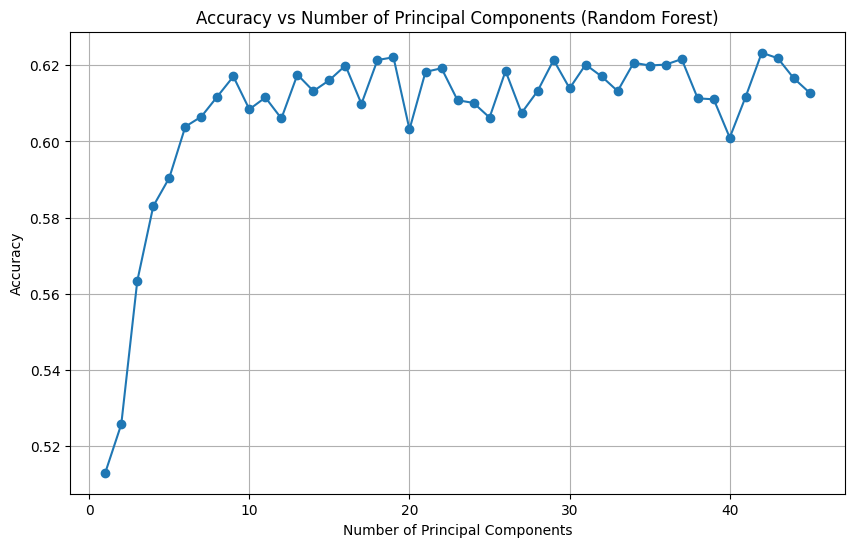

In [136]:
# Plotting accuracy versus number of principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Principal Components (Random Forest)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [138]:
print(n, max_acc)

45 0.6233205374280231


In [142]:
nbest=9

# Modeling

## Data Splitting

In [143]:
# X=df.drop('readmitted')
# y=df['readmitted']

In [155]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already loaded your dataframe into df

# Separate features and target variable
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

# Splitting data into train and test sets
X_train, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA with n_components=9
pca = PCA(n_components=9)
x_train1 = pca.fit_transform(X_train_scaled)
x_test = pca.transform(X_test_scaled)


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [157]:
df

,num_medications,num_lab_procedures,time_in_hospital,admission_type_id,discharge_disposition_id,admission_source_id,num_procedures,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,-0.477735,-0.286383,-0.838448,0.000000,0.074074,0.238095,0.0,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.375143,-2.166009,0.676848,0.285714,0.185185,0.285714,0.4,0.000,0.0000,0.047619,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.569241,-0.025324,-0.080800,0.000000,0.481481,0.285714,0.2,0.000,0.0000,0.095238,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.029031,-1.435043,-0.459624,0.142857,0.185185,0.285714,0.0,0.000,0.0000,0.000000,...,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-1.225575,-2.166009,-0.459624,0.000000,0.000000,0.285714,0.0,0.075,0.0625,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20835,2.064922,-0.390807,-0.080800,0.285714,0.629630,0.000000,0.8,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,1.0
20836,-1.076007,0.079099,-1.217271,0.000000,0.000000,0.285714,0.2,0.000,0.0000,0.000000,...,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20837,-0.776871,-0.129748,-0.838448,0.000000,0.185185,0.285714,0.0,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20838,-1.076007,-2.009373,-0.459624,0.142857,0.000000,0.142857,0.6,0.000,0.0000,0.000000,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [158]:
x_train

array([[-2.69507244,  0.21566742,  1.84479166, ...,  0.73064778,
        -0.22732497,  0.60684783],
       [-0.74015469, -0.34169016, -0.26217419, ..., -0.19184103,
         0.16797239, -0.03874649],
       [-1.19337177, -1.84839412, -1.07874147, ...,  0.0264667 ,
        -0.17061288,  0.42771503],
       ...,
       [-2.46369898, -0.36416711, -0.35885314, ..., -0.07889264,
        -0.75345343,  0.50961386],
       [ 0.7845591 ,  0.33828746, -0.27261701, ..., -0.2860961 ,
         0.31403045, -0.2383359 ],
       [ 1.7873906 , -0.18057099,  0.29610376, ..., -1.93298189,
         0.52186318,  0.75710766]])

In [159]:
y_train

20027    0.0
7877     1.0
17667    1.0
4461     0.0
15919    0.0
        ... 
11284    0.0
11964    1.0
5390     1.0
860      0.0
15795    1.0
Name: readmitted, Length: 16672, dtype: float64

## Models

### Logistic Regression

In [160]:
parameters = {'penalty':['l2'], 'C':[1.0, 10.0, 100.0, 1000.0],'fit_intercept':[True,False]}
model = LogisticRegression(max_iter=3000)
clf = GridSearchCV(model, parameters)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)

Best params for LR: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}


              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63      2127
         1.0       0.61      0.58      0.59      2041

    accuracy                           0.61      4168
   macro avg       0.61      0.61      0.61      4168
weighted avg       0.61      0.61      0.61      4168



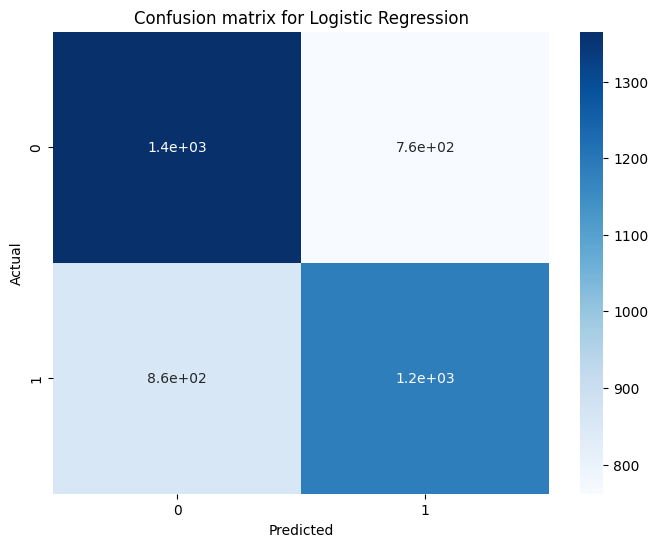

In [161]:
predict = clf.predict(x_test)
print(classification_report(y_test, predict))
cm = confusion_matrix(y_test, predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

### Decision Trees

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth': [5, 6, 7, 8, 9, None],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier()

# Set verbose to a positive integer value to print progress messages
clf = GridSearchCV(model, param_grid, verbose=2)
clf.fit(x_train1, y_train1)

dt_best_param = clf.best_params_
print("Best params for DT:", dt_best_param)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ccp_alpha=0.1, cri

              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63      2127
         1.0       0.61      0.55      0.58      2041

    accuracy                           0.61      4168
   macro avg       0.61      0.61      0.61      4168
weighted avg       0.61      0.61      0.61      4168



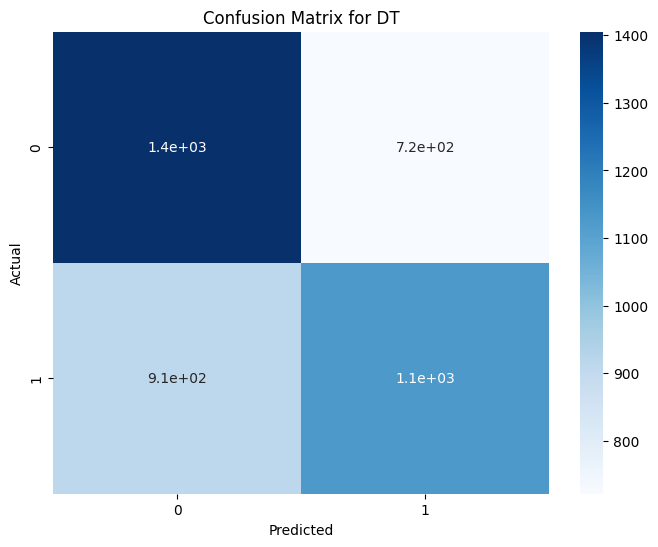

In [163]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DT')
plt.show()

### Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [20,60,80,100,120,150,180,200],
    'max_depth' : [4,5,6,7,8,9,10,None],
    'criterion' :['gini','entropy']
}

model = RandomForestClassifier()

# Set verbose to a positive integer value to print progress messages
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(x_train1, y_train1)

rf_best_param = clf.best_params_
print("Best params for RF:", rf_best_param)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.5s
[CV] END .......criterion=gini, max_depth=4, n_estimators=20; total time=   0.6s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.3s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.2s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.2s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.2s
[CV] END .......criterion=gini, max_depth=4, n_estimators=60; total time=   1.2s
[CV] END .......criterion=gini, max_depth=4, n_estimators=80; total time=   1.5s
[CV] END .......criterion=gini, max_depth=4, n

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64      2127
         1.0       0.62      0.61      0.61      2041

    accuracy                           0.63      4168
   macro avg       0.63      0.63      0.63      4168
weighted avg       0.63      0.63      0.63      4168



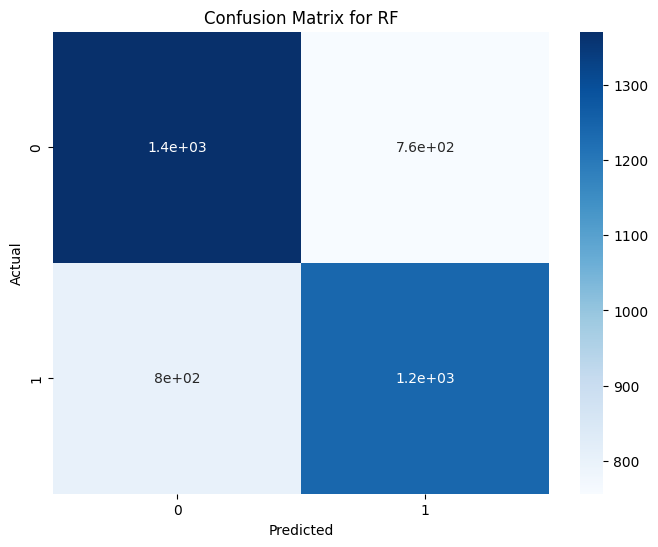

In [165]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(classification_report(y_test, predict))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF')
plt.show()

### XGBoost Classifier

In [166]:
import xgboost as xgb

param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.01, 0.001]}

model = xgb.XGBClassifier()
clf = GridSearchCV(model, param_grid, cv=5, verbose=2)
clf.fit(x_train1, y_train1)

logreg_best_param = clf.best_params_
print("Best params for XGBoost:", logreg_best_param)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

              precision    recall  f1-score   support

         0.0       0.62      0.65      0.64      2127
         1.0       0.62      0.59      0.60      2041

    accuracy                           0.62      4168
   macro avg       0.62      0.62      0.62      4168
weighted avg       0.62      0.62      0.62      4168



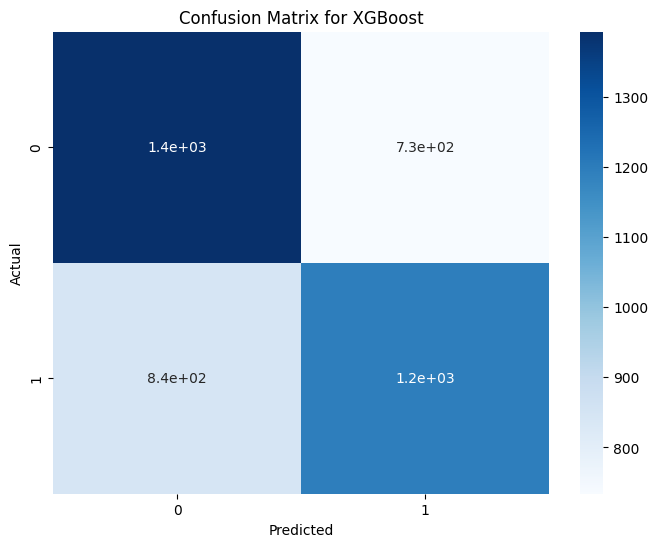

In [167]:
predict = clf.predict(x_test)
cm = confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

### KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
max_i=-1
max_accuracy=-1
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    if acc>max_accuracy:
      max_i=i
      max_accuracy=acc

    scores.append(accuracy_score(y_test, y_pred))

Best params for KNN: {n_neighbors: 11}


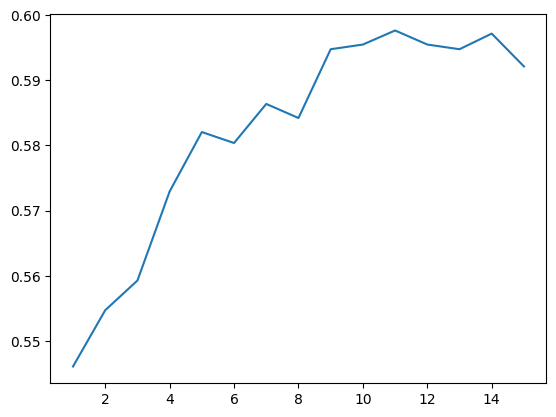

In [169]:
import matplotlib.pyplot as plt
print("Best params for KNN: {n_neighbors: ", max_i,"}",sep="")
plt.plot(range(1,16),scores)

              precision    recall  f1-score   support

         0.0       0.60      0.61      0.61      2127
         1.0       0.59      0.58      0.59      2041

    accuracy                           0.60      4168
   macro avg       0.60      0.60      0.60      4168
weighted avg       0.60      0.60      0.60      4168



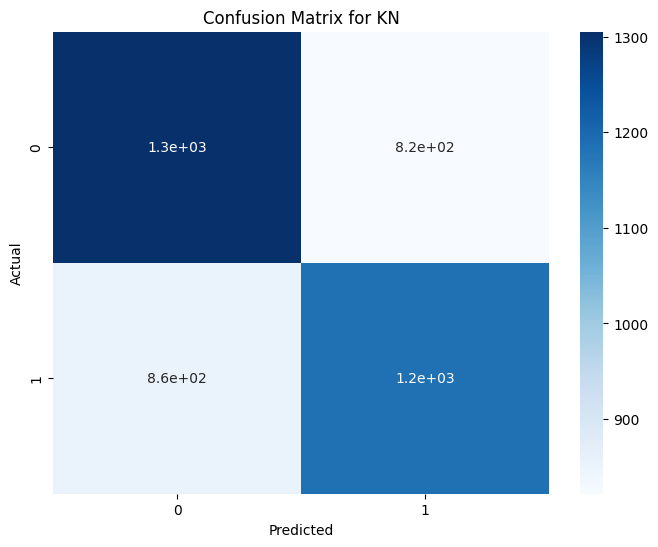

In [170]:
knn = KNeighborsClassifier(n_neighbors=max_i)
knn.fit(x_train1,y_train1)
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KN')
plt.show()